In [366]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [367]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [368]:
df.shape

(177866, 17)

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [370]:
df["Electric Vehicle Type"].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [371]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched',
       'Not eligible due to low battery range'], dtype=object)

In [372]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [373]:
df.dropna(inplace=True)

In [374]:
df.shape

(177473, 17)

### EV Adoption Over Time: Analyze the growth of the EV population by model year.


In [375]:
df_adoption_by_year = df["Model Year"].value_counts().sort_index()
df_adoption_by_year

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

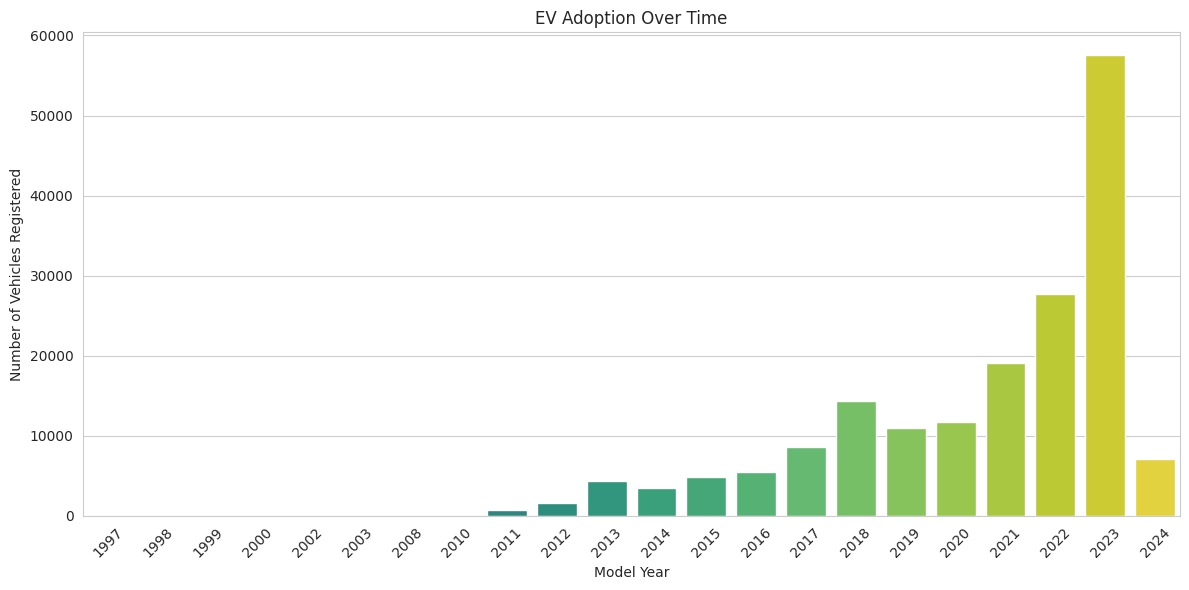

In [376]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(
    x=df_adoption_by_year.index,
    y=df_adoption_by_year.values,
    palette="viridis",
    hue=df_adoption_by_year.index,
    legend=False,
)
plt.title("EV Adoption Over Time")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles Registered")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).

In [377]:
# geographical distribution at county level
ev_county_distribution = df["County"].value_counts()
top_counties = ev_county_distribution.head(3).index
top_counties

Index(['King', 'Snohomish', 'Pierce'], dtype='object', name='County')

In [378]:
# filtering the dataset for these top counties
top_counties_data = df[df["County"].isin(top_counties)]
top_counties_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
7,KNAGV4LD9J,Snohomish,Bothell,WA,98012.0,2018,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29,0,1.0,290605598,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10


In [379]:
# analyzing the distribution of EVs within the cities of these top counties
df_city_distribution_top_counties = (
    top_counties_data.groupby(["County", "City"])
    .size()
    .sort_values(ascending=False)
    .reset_index(name="Number of Vehicles")
)

In [380]:
# visualize the top 10 cities across these counties
top_cities = df_city_distribution_top_counties.head(10)
top_cities

,County,City,Number of Vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
5,King,Renton,4980
6,Snohomish,Bothell,4663
7,Pierce,Tacoma,3722
8,King,Tukwila,2927
9,King,Kent,2782


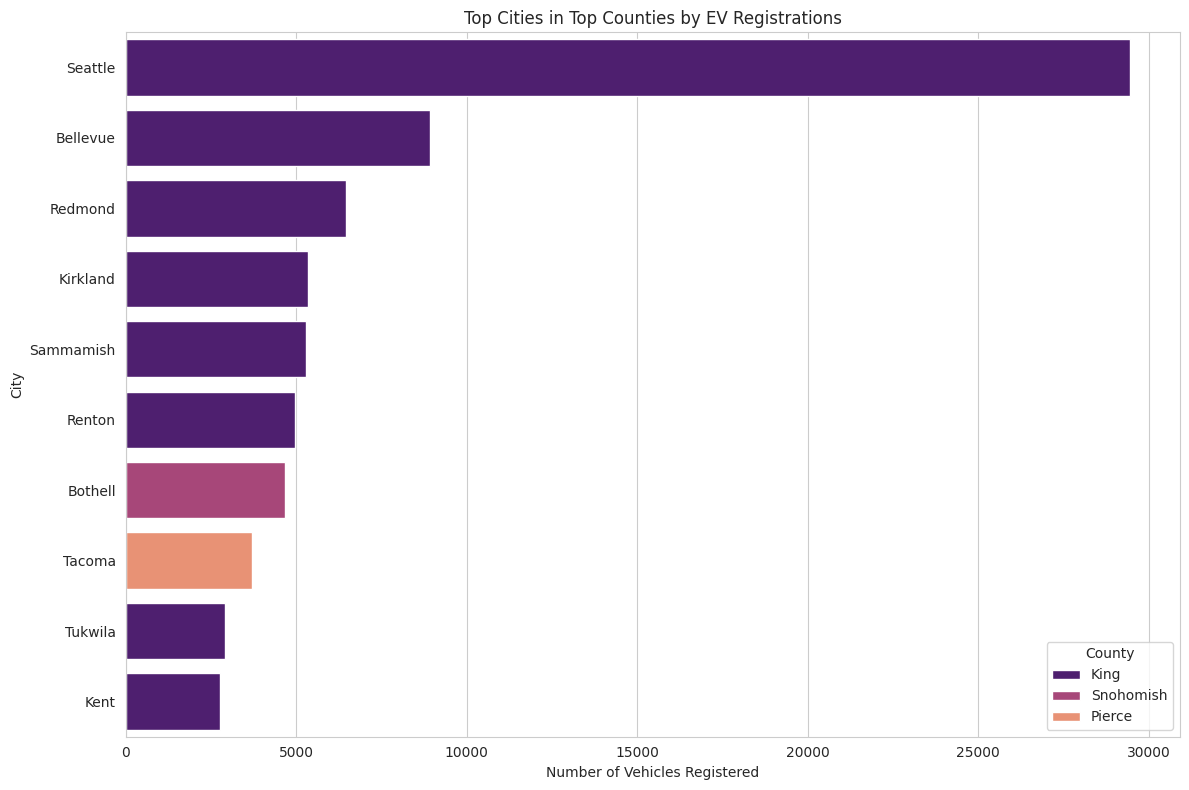

In [381]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x="Number of Vehicles", y="City", hue="County", data=top_cities, palette="magma"
)
plt.title("Top Cities in Top Counties by EV Registrations")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("City")
plt.legend(title="County")
plt.tight_layout()
plt.show()

### EV Types: Breakdown of the dataset by electric vehicle type

In [382]:
# analyzing the distribution of electric vehicle Types
df_ev_type_distribution = df["Electric Vehicle Type"].value_counts()
df_ev_type_distribution

Electric Vehicle Type
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: count, dtype: int64

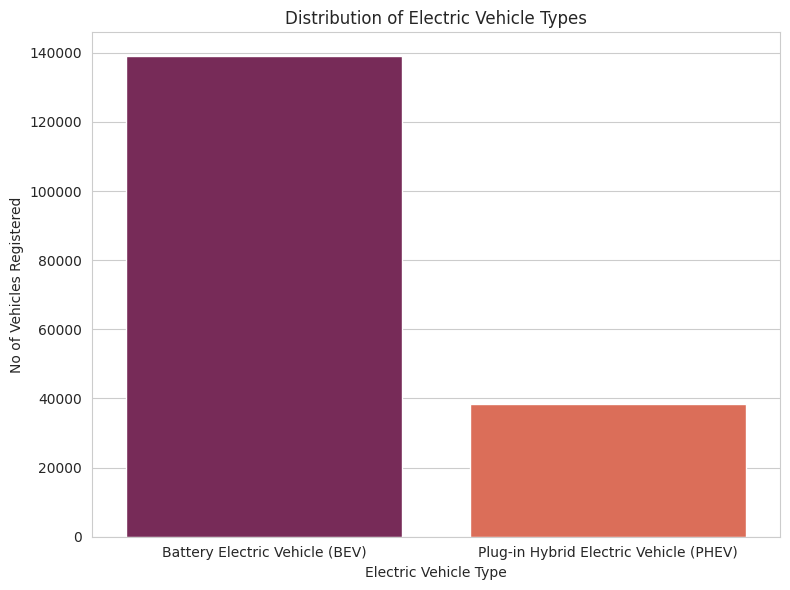

In [383]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x=df_ev_type_distribution.index,
    y=df_ev_type_distribution.values,
    hue=df_ev_type_distribution.index,
    palette="rocket",
)
plt.xlabel("Electric Vehicle Type")
plt.ylabel("No of Vehicles Registered")
plt.title("Distribution of Electric Vehicle Types")
plt.tight_layout()
plt.show()

### Make and Model Popularity: Identify the most popular makes and models among the registered EVs.

In [384]:
# analyzing the popularity of EV manufacturers
df_ev_make_distribution = (
    df["Make"].value_counts().head(10)
)  # Limiting to top 10 for clarity
df_ev_make_distribution

Make
TESLA         79471
NISSAN        13984
CHEVROLET     13651
FORD           9177
BMW            7556
KIA            7423
TOYOTA         6254
VOLKSWAGEN     4993
JEEP           4468
HYUNDAI        4398
Name: count, dtype: int64

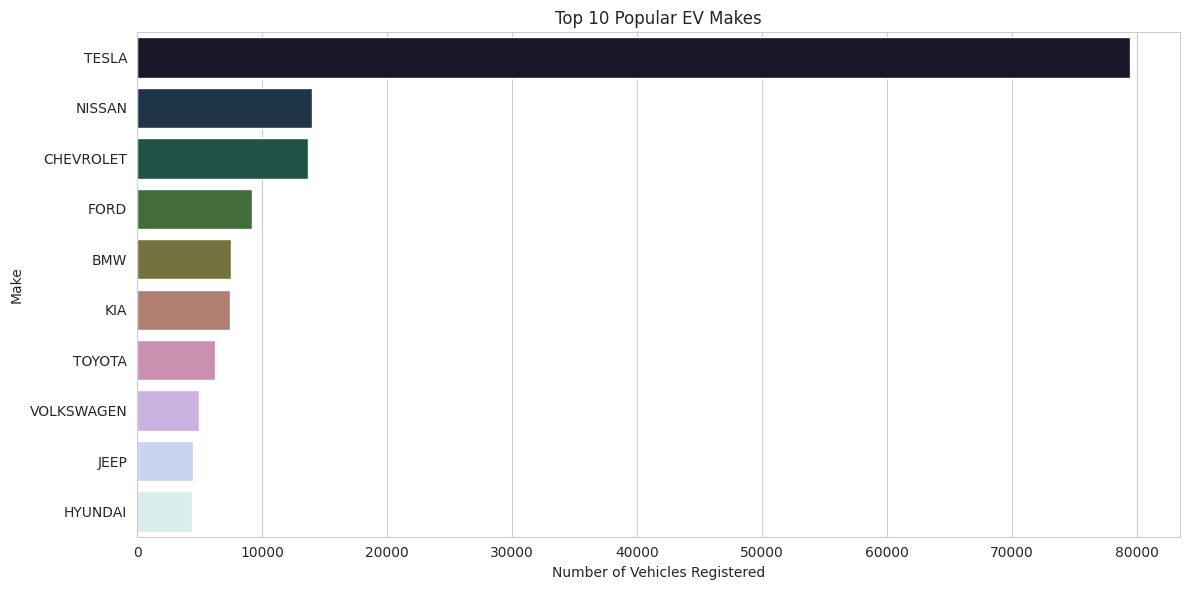

In [385]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=df_ev_make_distribution.values,
    y=df_ev_make_distribution.index,
    hue=df_ev_make_distribution.index,
    palette="cubehelix",
)
plt.title("Top 10 Popular EV Makes")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Make")
plt.tight_layout()
plt.show()

#### The most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level


In [386]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = df_ev_make_distribution.head(3).index
top_3_makes

Index(['TESLA', 'NISSAN', 'CHEVROLET'], dtype='object', name='Make')

In [387]:
# filtering the dataset for these top manufacturers
df_top_makes_data = df[df["Make"].isin(top_3_makes)]

In [388]:
# analyzing the popularity of EV models within these top manufacturers
df_ev_model_distribution_top_makes = (
    df_top_makes_data.groupby(["Make", "Model"])
    .size()
    .sort_values(ascending=False)
    .reset_index(name="Number of Vehicles")
)

In [389]:
# visualizing the top 10 models across these manufacturers for clarity
top_models = df_ev_model_distribution_top_makes.head(10)
top_models

,Make,Model,Number of Vehicles
0,TESLA,MODEL Y,35921
1,TESLA,MODEL 3,30009
2,NISSAN,LEAF,13352
3,TESLA,MODEL S,7711
4,CHEVROLET,BOLT EV,6811
5,TESLA,MODEL X,5784
6,CHEVROLET,VOLT,4782
7,CHEVROLET,BOLT EUV,1770
8,NISSAN,ARIYA,632
9,CHEVROLET,SPARK,240


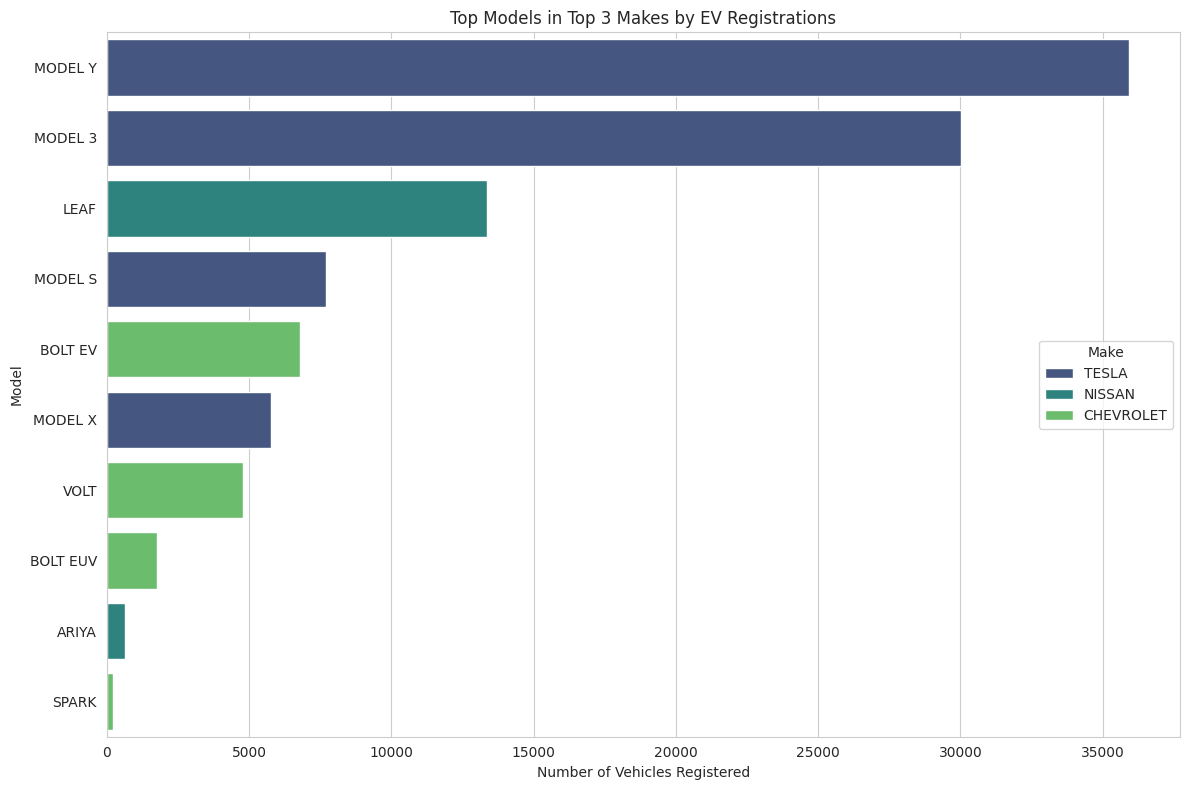

In [390]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x="Number of Vehicles", y="Model", hue="Make", data=top_models, palette="viridis"
)
plt.title("Top Models in Top 3 Makes by EV Registrations")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Model")
plt.legend(title="Make", loc="center right")
plt.tight_layout()
plt.show()